## MODULO 3 Evaluacion Final

### 1. Exploracion y Limpieza

Carga de Librerias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
%matplotlib inline 
sns.set_style("whitegrid") #fondo blanco con cuadricula
pd.set_option('display.max_columns', None) # mostrar todas las columnas al imprimir un DataFrame para evitar los puntos suspensivos cuando hay muchas columnas

Exploracion Inicial

In [9]:
# Carga de los datasets
df_flights = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

# Inspección de dimensiones y tipos
print(f"Dimensiones de Vuelos: {df_flights.shape}")
print(f"Dimensiones de Historial: {df_loyalty.shape}")

# Ver nulos y tipos de datos
print("\n--- Info Vuelos ---")
print(df_flights.info())
print("\n--- Info Historial ---")
print(df_loyalty.info())

Dimensiones de Vuelos: (405624, 10)
Dimensiones de Historial: (16737, 16)

--- Info Vuelos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None

--- Info Historial ---
<class

Unión de Datos

In [10]:
# Unimos por la columna 'Loyalty Number'
# Usamos un 'left' para mantener toda la actividad de vuelos y añadir la info del perfil del cliente
df_merged = df_flights.merge(df_loyalty, on='Loyalty Number', how='left')

print(f"Dataset unido: {df_merged.shape}")
df_merged.head()

Dataset unido: (405624, 25)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


Limpieza de Datos

In [11]:
# 1. Tratamiento de nulos en Salary
# Para evitar sesgos extremos, imputamos la mediana del salario
df_merged['Salary'] = df_merged['Salary'].fillna(df_merged['Salary'].median())

# 2. Conversión de tipos (si es necesario)
# Por ejemplo, asegurar que Month sea legible o que el año sea entero
df_merged['Year'] = df_merged['Year'].astype(int)

# 3. Eliminar columnas que no aporten al análisis masivo (opcional)
# Las fechas de cancelación tienen demasiados nulos porque la mayoría no ha cancelado.

### 2. Analisis Estadistico

Estadistica Descriptiva y Correlacion

In [ ]:
# Estadisticos de variables numericas principales
num_cols = ['Flights Booked', 'Distance', 'Points Accumulated', 'Salary', 'CLV']
print(df_merged[num_cols].describe())

       Flights Booked       Distance  Points Accumulated         Salary  \
count   405624.000000  405624.000000       405624.000000  405624.000000   
mean         4.115052    1208.880059          123.692721   77803.298740   
std          5.225518    1433.155320          146.599831   30345.543901   
min          0.000000       0.000000            0.000000  -58486.000000   
25%          0.000000       0.000000            0.000000   63899.000000   
50%          1.000000     488.000000           50.000000   73479.000000   
75%          8.000000    2336.000000          239.000000   82940.000000   
max         21.000000    6293.000000          676.500000  407228.000000   

                 CLV  
count  405624.000000  
mean     7991.976226  
std      6863.663857  
min      1898.010000  
25%      3985.320000  
50%      5776.340000  
75%      8936.820000  
max     83325.380000  


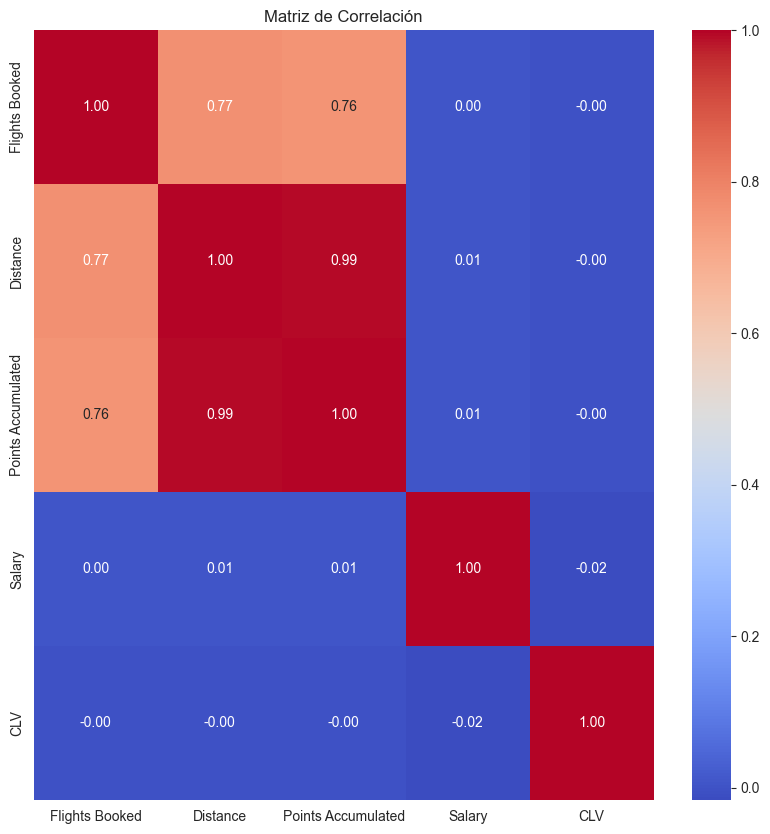

In [16]:
# Análisis de correlación
plt.figure(figsize=(10, 10))
sns.heatmap(df_merged[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()